# Objective: 
The goal is to predict whether a song will be popular based on audio features such as 
danceability, energy, and loudness using classification techniques.

# Importing Dependencies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,r2_score,roc_auc_score,roc_curve

In [16]:
df = pd.read_csv('dataset.csv')

In [17]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [18]:
df.shape

(114000, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [21]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [22]:
df.describe(include = 'O')

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [23]:
#Deleting unwanted columns
df.drop(columns=['track_id','Unnamed: 0'],inplace = True)

In [24]:
df.drop(columns =['track_genre'],inplace =True)

In [25]:
df.isna().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [26]:
df[df.duplicated()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1925,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.5770,0,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.8430,90.522,4
2046,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,False,0.588,0.8470,8,-4.164,1,0.0705,0.0601,0.000000,0.3070,0.6620,120.041,4
2085,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.4340,0,-8.163,1,0.0288,0.3160,0.171000,0.2130,0.1860,77.983,3
2094,Weezer,Alternative Christmas 2022,We Wish You A Merry Christmas,0,84973,False,0.387,0.7860,11,-4.127,1,0.0436,0.0195,0.000000,0.1230,0.4620,149.806,3
2155,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9000,11,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.5990,104.655,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113605,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4
113617,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4
113619,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4
113641,Bethel Music;Steffany Gretzinger,For the Sake of the World,Closer,49,413573,False,0.322,0.5580,4,-8.321,1,0.0306,0.0596,0.000160,0.1020,0.0813,139.920,4


In [27]:
df.drop_duplicates(keep='last',inplace = True)

In [28]:
df.duplicated().sum()

0

# EDA

In [29]:
df1 = df.copy()

In [73]:
popular_album =df1.groupby(['album_name'])['popularity'].sum().sort_values(ascending = False)[:11]

In [74]:
x=[]
for i in popular_album.index:
    x.append(i[:7])

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\2037837317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= x ,y=popular_album.values,palette='magma')


Text(0, 0.5, 'Popularity')

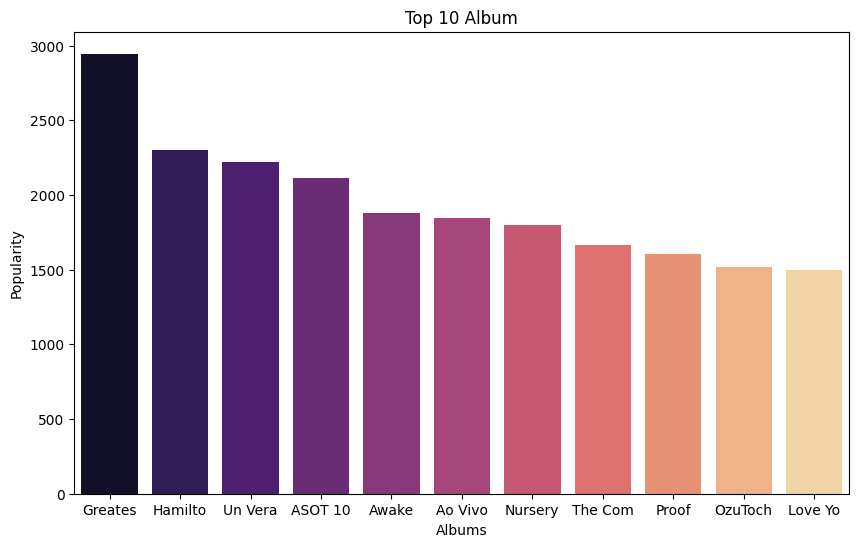

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x= x ,y=popular_album.values,palette='magma')
plt.title('Top 10 Album')
plt.xlabel('Albums')
plt.ylabel('Popularity')

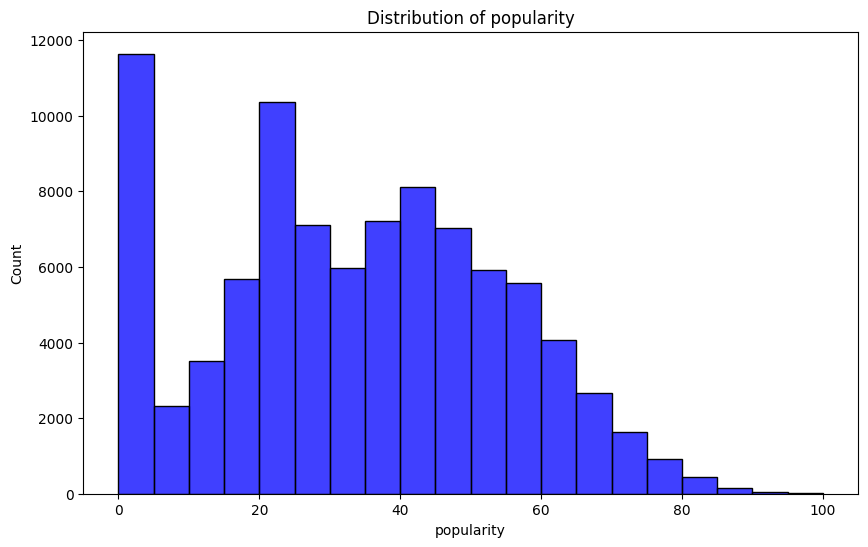

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['popularity'],bins =20, color='b')
plt.title('Distribution of popularity')
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\2088686375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=pd.cut(df['loudness'], bins=5), y='popularity', palette='coolwarm')


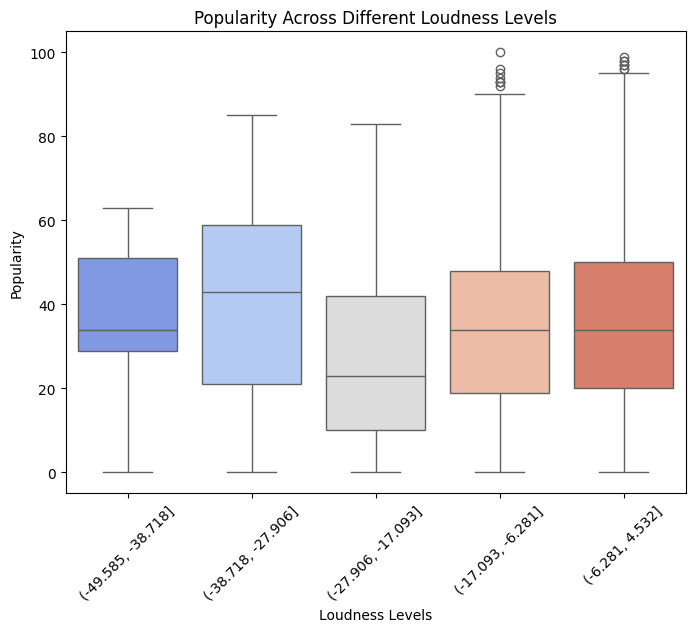

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x=pd.cut(df['loudness'], bins=5), y='popularity', palette='coolwarm')
plt.title('Popularity Across Different Loudness Levels')
plt.xlabel('Loudness Levels')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\3460915345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tempo_counts.index, y=tempo_counts.values, palette='magma')


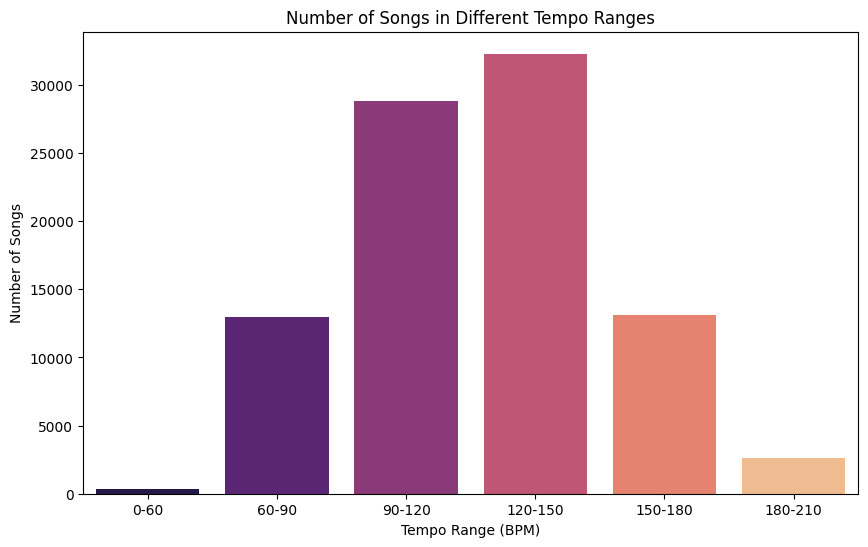

In [80]:
df1['tempo_range'] = pd.cut(df1['tempo'], bins=[0, 60, 90, 120, 150, 180, 210], labels=['0-60', '60-90', '90-120', '120-150', '150-180', '180-210'])
plt.figure(figsize=(10, 6))
tempo_counts = df1['tempo_range'].value_counts().sort_index()
sns.barplot(x=tempo_counts.index, y=tempo_counts.values, palette='magma')
plt.title('Number of Songs in Different Tempo Ranges')
plt.xlabel('Tempo Range (BPM)')
plt.ylabel('Number of Songs')
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\2225610518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_tempo = df1.groupby('tempo_range')['popularity'].mean()
C:\Users\awais\AppData\Local\Temp\ipykernel_2656\2225610518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_tempo.index, y=avg_popularity_by_tempo.values, palette='plasma')


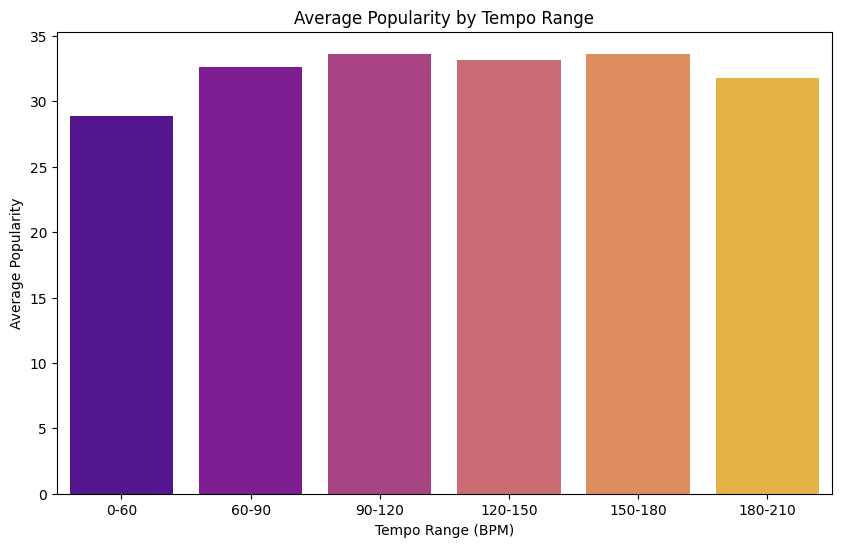

In [81]:
avg_popularity_by_tempo = df1.groupby('tempo_range')['popularity'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity_by_tempo.index, y=avg_popularity_by_tempo.values, palette='plasma')
plt.title('Average Popularity by Tempo Range')
plt.xlabel('Tempo Range (BPM)')
plt.ylabel('Average Popularity')
plt.show()

In [82]:
df1['loudness_range'] = pd.cut(df1['loudness'], bins=[-45, -35, -25, -15, -5, 5])

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\436945708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loundness_counts.index, y=loundness_counts.values, palette='magma')


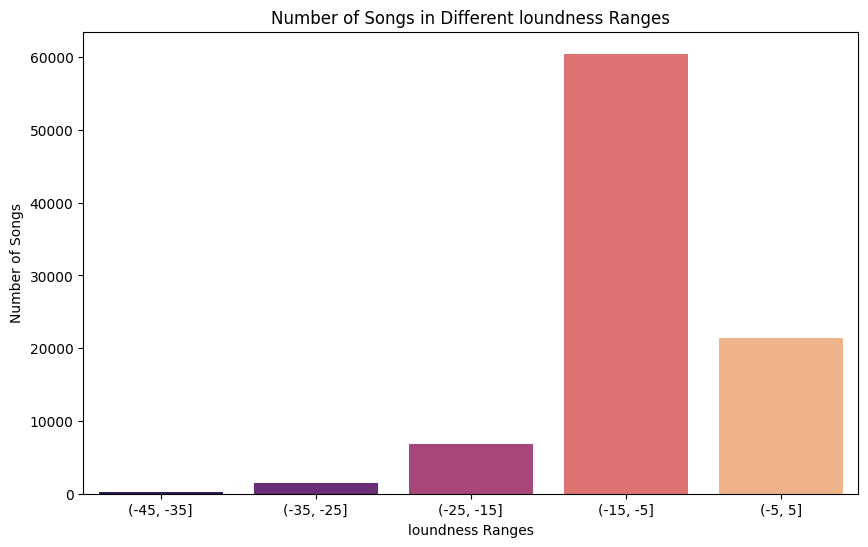

In [83]:
plt.figure(figsize=(10, 6))
loundness_counts = df1['loudness_range'].value_counts().sort_index()
sns.barplot(x=loundness_counts.index, y=loundness_counts.values, palette='magma')
plt.title('Number of Songs in Different loundness Ranges')
plt.xlabel('loundness Ranges')
plt.ylabel('Number of Songs')
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_2656\1545030206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_tempo = df1.groupby('loudness_range')['popularity'].mean()
C:\Users\awais\AppData\Local\Temp\ipykernel_2656\1545030206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_tempo.index, y=avg_popularity_by_tempo.values, palette='plasma')


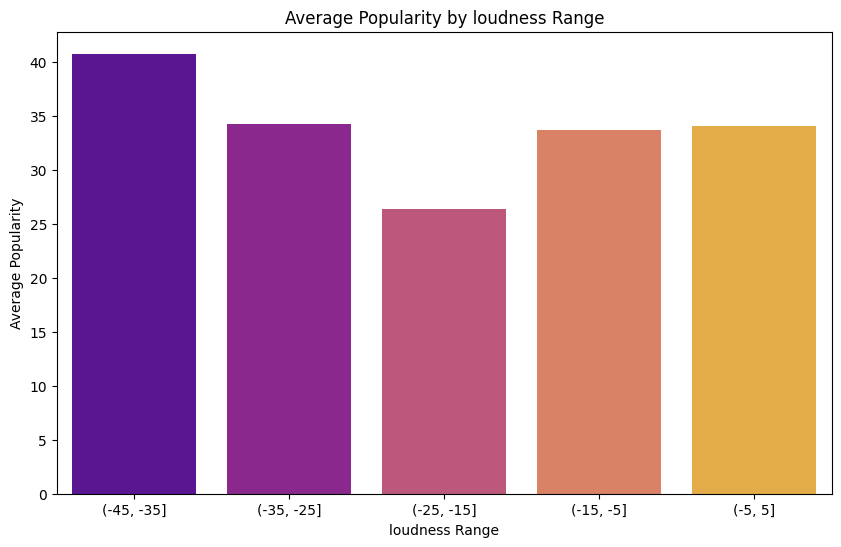

In [84]:
avg_popularity_by_tempo = df1.groupby('loudness_range')['popularity'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity_by_tempo.index, y=avg_popularity_by_tempo.values, palette='plasma')
plt.title('Average Popularity by loudness Range')
plt.xlabel('loudness Range')
plt.ylabel('Average Popularity')
plt.show()

In [85]:
#The popularity rate is high when the loundess is in the range between (-45,-35)

In [89]:
df.drop(columns=['artists', 'album_name', 'track_name'],inplace = True)

In [90]:
cor =df.corr()

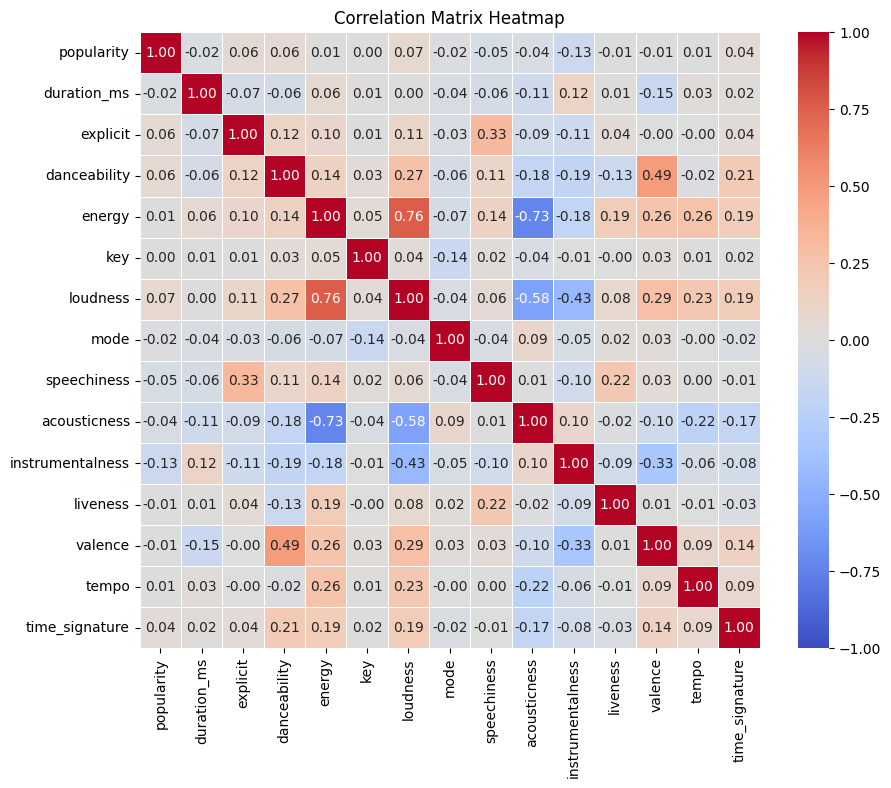

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engineering

In [64]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [65]:
df['is_popular'] = df['popularity'].apply(lambda x : 1 if x>60 else 0)

In [66]:
df.drop(columns = ['popularity'],inplace = True)

# Modeling

In [67]:
X = df.drop(columns = ['is_popular'])
y= df['is_popular']
        

In [68]:
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4
8,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4
10,244800,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.3010,99.905,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5
113996,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4
113997,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4
113998,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4


In [69]:
y

2         0
3         1
4         1
8         1
10        1
         ..
113995    0
113996    0
113997    0
113998    0
113999    0
Name: is_popular, Length: 86706, dtype: int64

In [70]:
StandardS = StandardScaler()

In [71]:
X = StandardS.fit_transform(X)

In [72]:
X

array([[-0.1731876 , -0.30589452, -0.69728816, ..., -1.31835523,
        -1.52555135,  0.22440615],
       [-0.25095871, -0.30589452, -1.66978232, ..., -1.23087484,
         1.97940819, -1.9864062 ],
       [-0.27789395, -0.30589452,  0.32043828, ..., -1.13959096,
        -0.07522671,  0.22440615],
       ...,
       [ 0.35712166, -0.30589452,  0.38263268, ...,  1.05122222,
         0.33805447,  0.22440615],
       [ 0.46579832, -0.30589452,  0.14516317, ..., -0.20393116,
         0.45716085,  0.22440615],
       [ 0.09791377, -0.30589452, -0.19973301, ...,  0.91809989,
        -1.43025295,  0.22440615]])

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =23)

In [74]:
Logreg = LogisticRegression()

In [75]:
Logreg.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred_log = Logreg.predict(X_test)

In [77]:
print(confusion_matrix(y_test,y_pred_log))

[[15513     0]
 [ 1829     0]]


In [78]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15513
           1       0.00      0.00      0.00      1829

    accuracy                           0.89     17342
   macro avg       0.45      0.50      0.47     17342
weighted avg       0.80      0.89      0.84     17342



C:\Users\awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\awais\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Class Imbalanced Issue

#From the logistic regression there is a class imbalanced issue to resolve this i will use a module

In [79]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size =0.2,random_state =23)

In [81]:
Logreg.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred = Logreg.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58     15630
           1       0.60      0.71      0.65     15481

    accuracy                           0.62     31111
   macro avg       0.62      0.62      0.61     31111
weighted avg       0.62      0.62      0.61     31111



# Decision Tree

In [84]:
dt= tree.DecisionTreeClassifier()

In [85]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dt = dt.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     15630
           1       0.89      1.00      0.94     15481

    accuracy                           0.94     31111
   macro avg       0.94      0.94      0.94     31111
weighted avg       0.94      0.94      0.94     31111



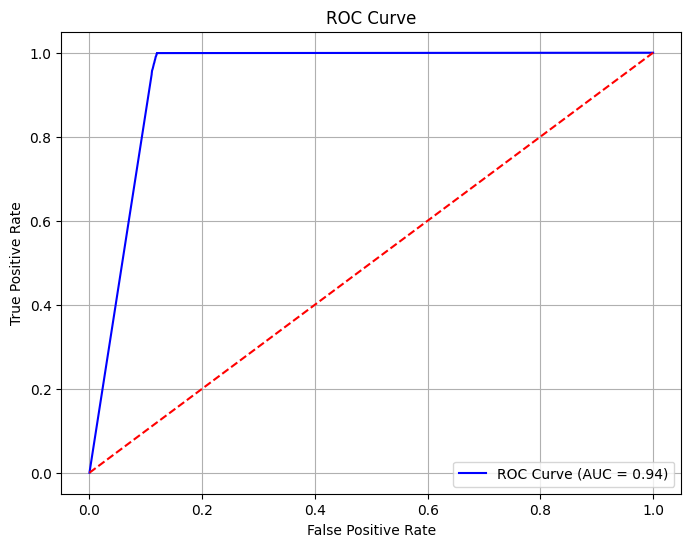

In [90]:
# Get predicted probabilities for the positive class
y_probs = dt.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Random Forest

In [91]:
rfc = RandomForestClassifier()

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
y_pred_rfc=rfc.predict(X_test)

In [107]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15630
           1       0.98      1.00      0.99     15481

    accuracy                           0.99     31111
   macro avg       0.99      0.99      0.99     31111
weighted avg       0.99      0.99      0.99     31111



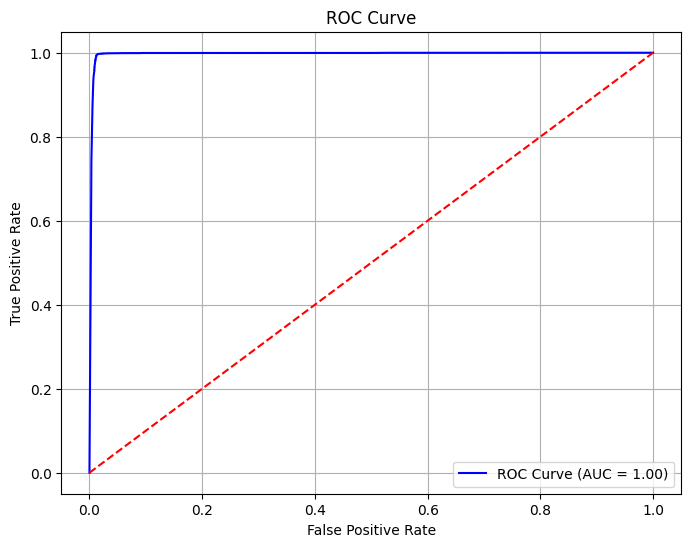

In [108]:
# Get predicted probabilities for the positive class
y_probs = rfc.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# SVM

In [96]:
svc = SVC()

In [97]:
svc.fit(X_train,y_train)

SVC()

In [98]:
y_pred_svc=svc.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.55      0.65     15630
           1       0.65      0.84      0.73     15481

    accuracy                           0.69     31111
   macro avg       0.71      0.70      0.69     31111
weighted avg       0.71      0.69      0.69     31111



# GradientBoosting

In [101]:
gbc = GradientBoostingClassifier()

In [103]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [104]:
y_pred_gbr=gbc.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred_gbr))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     15630
           1       0.64      0.76      0.70     15481

    accuracy                           0.67     31111
   macro avg       0.68      0.67      0.67     31111
weighted avg       0.68      0.67      0.67     31111

